In [177]:
import pandas as pd
pd.options.display.max_colwidth=200
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from plotly.subplots import make_subplots

### Pushing all the given data into the notebook for analysis for the year 2021

In [178]:
df_2021 = pd.read_csv(r'C:\Users\Praveen Shahani\Desktop\Erdos_Project\Datasets\2021\2021_OPM_FEVS_PRDF.csv')
df_Q = pd.read_excel(r'C:\Users\Praveen Shahani\Desktop\Erdos_Project\Datasets\2021\2021_OPM_FEVS_PRDF_Codebook.xlsx')
df_demo = pd.read_excel(r'C:\Users\Praveen Shahani\Desktop\Erdos_Project\Datasets\2021\2021_OPM_FEVS_PRDF_Codebook.xlsx',sheet_name='Demographics')
df_agency = pd.read_excel(r'C:\Users\Praveen Shahani\Desktop\Erdos_Project\Datasets\2021\2021_OPM_FEVS_PRDF_Codebook.xlsx',sheet_name='Agency Variable')
df_other = pd.read_excel(r'C:\Users\Praveen Shahani\Desktop\Erdos_Project\Datasets\2021\2021_OPM_FEVS_PRDF_Codebook.xlsx',sheet_name='Other Variables')

In [179]:
df_Q

,VARIABLE,ITEM TEXT,RESPONSE VALUE,RESPONSE CHOICES,HEADERS AND NOTES
0,Q1,I am given a real opportunity to improve my skills in my organization.,5,Strongly Agree,NaN
1,Q1,I am given a real opportunity to improve my skills in my organization.,4,Agree,NaN
2,Q1,I am given a real opportunity to improve my skills in my organization.,3,Neither Agree nor Disagree,NaN
3,Q1,I am given a real opportunity to improve my skills in my organization.,2,Disagree,NaN
4,Q1,I am given a real opportunity to improve my skills in my organization.,1,Strongly Disagree,NaN
...,...,...,...,...,...
348,Q57,"Based on my organization's handling of the COVID-19 pandemic, I believe my organization will respond effectively to future emergencies.",4,Agree,NaN
349,Q57,"Based on my organization's handling of the COVID-19 pandemic, I believe my organization will respond effectively to future emergencies.",3,Neither Agree nor Disagree,NaN
350,Q57,"Based on my organization's handling of the COVID-19 pandemic, I believe my organization will respond effectively to future emergencies.",2,Disagree,NaN
351,Q57,"Based on my organization's handling of the COVID-19 pandemic, I believe my organization will respond effectively to future emergencies.",1,Strongly Disagree,NaN


In [180]:
df_2021.head()

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5,4,4,4,...,A,B,B,B,B,A,A,A,A,2.209652
1,194868625278,XX,3.0,2.0,4.0,3.0,4,2,4,2,...,NaN,A,B,B,B,B,A,A,C,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3,4,5,4,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5,5,5,5,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4,3,5,4,...,B,B,B,B,B,B,A,A,A,1.735842


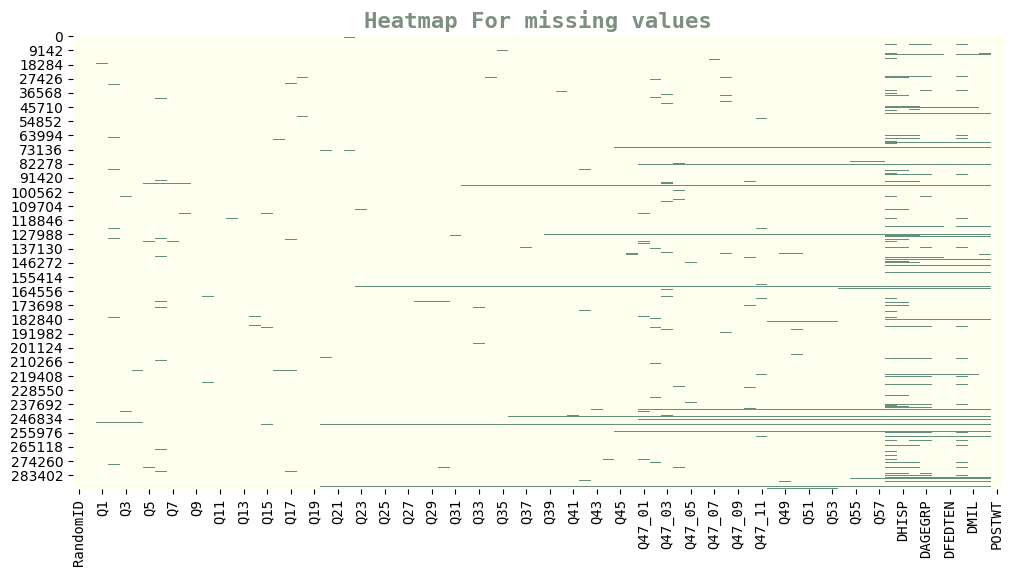

In [181]:
plt.figure(figsize=(12,6) , dpi=100)
sns.heatmap(df_2021.isna(), cmap='YlGn', cbar = False, alpha = 0.6)
plt.xticks(rotation=90)
hfont = {'fontname':'monospace'}
plt.title ('Heatmap For missing values',
           **hfont,
           color = '#29452b',
           weight = 'semibold',
           fontsize = 16,
           alpha = 0.6)
plt.xticks(**hfont)
plt.show()

We suspected, among categorical variables, some repsonses such as 'I don't know' is allocated 'X', which could be a potential problem while applying analysis 

In [182]:
df_2021.columns.values[1:]

array(['agency', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27',
       'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36',
       'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45',
       'Q46', 'Q47_01', 'Q47_02', 'Q47_03', 'Q47_04', 'Q47_05', 'Q47_06',
       'Q47_07', 'Q47_08', 'Q47_09', 'Q47_10', 'Q47_11', 'Q48', 'Q49',
       'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'DRNO',
       'DHISP', 'DDIS', 'DAGEGRP', 'DSUPER', 'DFEDTEN', 'DSEX', 'DMIL',
       'DLEAVING', 'POSTWT'], dtype=object)

In [183]:
#df_2021.columns.values
for i in df_2021.columns.values[1:]:
    df_2021[i] = df_2021[i].replace(['X'], df_2021[i].mode()[0])
df_2021 = df_2021.replace(np.nan, 0)

In [184]:
df_2021

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5,4,4,4,...,A,B,B,B,B,A,A,A,A,2.209652
1,194868625278,XX,3.0,2.0,4.0,3.0,4,2,4,2,...,0,A,B,B,B,B,A,A,C,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3,4,5,4,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5,5,5,5,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4,3,5,4,...,B,B,B,B,B,B,A,A,A,1.735842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292515,154057939422,ST,3.0,4.0,4.0,3.0,4,4,2,4,...,B,B,B,A,A,A,B,B,A,3.004992
292516,151758964104,ST,3.0,4.0,2.0,4.0,2,2,3,3,...,B,B,B,A,A,A,B,B,D,4.427855
292517,143492802997,ST,3.0,3.0,0.0,4.0,4,4,4,3,...,0,0,0,0,0,A,A,0,A,4.202227
292518,110267537558,ST,2.0,4.0,5.0,5.0,2,1,5,4,...,B,B,B,A,A,A,B,B,C,3.523113


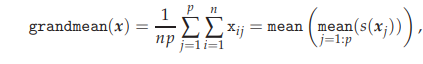

In [185]:
out = ((df_2021.groupby("DSEX").transform("mean")-df_2021.mean())
       .fillna({"DSEX":df_2021['DSEX']}).reindex(columns=df_2021.columns))
print(out)

            RandomID  agency        Q1        Q2        Q3        Q4  Q5  Q6  \
0      -4.138965e+07     NaN  0.031039  0.015379 -0.002264  0.013386 NaN NaN   
1      -4.138965e+07     NaN  0.031039  0.015379 -0.002264  0.013386 NaN NaN   
2      -4.138965e+07     NaN  0.031039  0.015379 -0.002264  0.013386 NaN NaN   
3      -4.138965e+07     NaN  0.031039  0.015379 -0.002264  0.013386 NaN NaN   
4      -4.138965e+07     NaN  0.031039  0.015379 -0.002264  0.013386 NaN NaN   
...              ...     ...       ...       ...       ...       ...  ..  ..   
292515  9.260172e+07     NaN  0.028461  0.049223  0.063857  0.032656 NaN NaN   
292516  9.260172e+07     NaN  0.028461  0.049223  0.063857  0.032656 NaN NaN   
292517 -4.138965e+07     NaN  0.031039  0.015379 -0.002264  0.013386 NaN NaN   
292518  9.260172e+07     NaN  0.028461  0.049223  0.063857  0.032656 NaN NaN   
292519 -4.138965e+07     NaN  0.031039  0.015379 -0.002264  0.013386 NaN NaN   

        Q7  Q8  ...  DRNO  DHISP  DDIS 

In [186]:
objects= [column for column, is_type in (df_2021.dtypes=="object").items() if is_type]
objects.remove('agency')
for i in objects[:-9]:
    df_2021[i] = df_2021[i].astype(float)
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292520 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  292520 non-null  int64  
 1   agency    292520 non-null  object 
 2   Q1        292520 non-null  float64
 3   Q2        292520 non-null  float64
 4   Q3        292520 non-null  float64
 5   Q4        292520 non-null  float64
 6   Q5        292520 non-null  float64
 7   Q6        292520 non-null  float64
 8   Q7        292520 non-null  float64
 9   Q8        292520 non-null  float64
 10  Q9        292520 non-null  float64
 11  Q10       292520 non-null  float64
 12  Q11       292520 non-null  float64
 13  Q12       292520 non-null  float64
 14  Q13       292520 non-null  float64
 15  Q14       292520 non-null  float64
 16  Q15       292520 non-null  float64
 17  Q16       292520 non-null  float64
 18  Q17       292520 non-null  float64
 19  Q18       292520 non-null  float64
 20  Q19 

In [187]:
df_2021.isnull().sum().sum()

0

In [188]:
questions = pd.DataFrame({'Question_no':df_Q['VARIABLE'].unique(),'Question':df_Q['ITEM TEXT'].unique()})
questions

,Question_no,Question
0,Q1,I am given a real opportunity to improve my skills in my organization.
1,Q2,I feel encouraged to come up with new and better ways of doing things.
2,Q3,My work gives me a feeling of personal accomplishment.
3,Q4,I know what is expected of me on the job.
4,Q5,My workload is reasonable.
...,...,...
62,Q53,My supervisor creates an environment where I can voice my concerns about staying healthy and safe.
63,Q54,"Does the type of work you do require you to be physically present at a worksite (e.g., border patrol agent, TSA agent, meat inspector)?"
64,Q55,My agency's leadership updates employees about return to the worksite planning.
65,Q56,"In plans to return more employees to the worksite, my organization has made employee safety a top priority."


In [189]:
demographics = pd.DataFrame({'abbreviation':df_demo['VARIABLE'].unique(),'Question':df_demo['ITEM TEXT'].unique()})
demographics

,abbreviation,Question
0,DRNO,Please select the racial category or categories with which you most closely identify.
1,DHISP,"Are you of Hispanic, Latino, or Spanish origin?"
2,DDIS,Are you an individual with a disability?
3,DAGEGRP,What is your age group?
4,DSUPER,What is your supervisory status?
5,DFEDTEN,How long have you been with the Federal Government (excluding military service)?
6,DSEX,Are you:
7,DMIL,What is your US military service status?
8,DLEAVING,"Are you considering leaving your organization within the next year, and if so, why?"


In [190]:
agency_name = pd.DataFrame({'abbreviation':df_agency['CODE'].unique(),'Question':df_agency['NAME'].unique()})
agency_name

,abbreviation,Question
0,AF,United States Department of the Air Force
1,AG,Department of Agriculture
2,AM,U.S. Agency for International Development
3,AR,United States Department of the Army
4,CM,Department of Commerce
5,CU,National Credit Union Administration
6,DD,"OSD, Joint Staff, Defense Agencies, and Field Activities"
7,DJ,Department of Justice
8,DL,Department of Labor
9,DN,Department of Energy


In [191]:
df_other

,VARIABLE,DESCRIPTION
0,RandomID,Randomly Assigned Number for individual cases
1,POSTWT,Weighting variable


In [192]:
df_Q['ITEM TEXT'].unique()

array(['I am given a real opportunity to improve my skills in my organization.',
       'I feel encouraged to come up with new and better ways of doing things.',
       'My work gives me a feeling of personal accomplishment.',
       'I know what is expected of me on the job.',
       'My workload is reasonable.',
       'My talents are used well in the workplace.',
       "I know how my work relates to the agency's goals.",
       'I can disclose a suspected violation of any law, rule or regulation without fear of reprisal.',
       'The people I work with cooperate to get the job done.',
       'In my work unit, steps are taken to deal with a poor performer who cannot or will not improve.',
       'In my work unit poor performers usually:',
       'In my work unit, differences in performance are recognized in a meaningful way.',
       'My work unit has the job-relevant knowledge and skills necessary to accomplish organizational goals.',
       'Employees in my work unit meet the nee

In [193]:
df_Q[df_Q['ITEM TEXT'].str.contains('satisfied')]

,VARIABLE,ITEM TEXT,RESPONSE VALUE,RESPONSE CHOICES,HEADERS AND NOTES
218,Q39,How satisfied are you with your involvement in decisions that affect your work?,5,Very Satisfied,NaN
219,Q39,How satisfied are you with your involvement in decisions that affect your work?,4,Satisfied,NaN
220,Q39,How satisfied are you with your involvement in decisions that affect your work?,3,Neither Satisfied nor Dissatisfied,NaN
221,Q39,How satisfied are you with your involvement in decisions that affect your work?,2,Dissatisfied,NaN
222,Q39,How satisfied are you with your involvement in decisions that affect your work?,1,Very Dissatisfied,NaN
223,Q40,How satisfied are you with the information you receive from management on what's going on in your organization?,5,Very Satisfied,NaN
224,Q40,How satisfied are you with the information you receive from management on what's going on in your organization?,4,Satisfied,NaN
225,Q40,How satisfied are you with the information you receive from management on what's going on in your organization?,3,Neither Satisfied nor Dissatisfied,NaN
226,Q40,How satisfied are you with the information you receive from management on what's going on in your organization?,2,Dissatisfied,NaN
227,Q40,How satisfied are you with the information you receive from management on what's going on in your organization?,1,Very Dissatisfied,NaN


In [194]:
df1 = df_2021.copy()
df1 = df1.drop(['RandomID', 'agency','POSTWT','DRNO','DHISP','DDIS','DSUPER','DFEDTEN','DSEX','DMIL','DLEAVING'], axis=1)
df_2021.corr().style.background_gradient(cmap='coolwarm')

,RandomID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47_01,Q47_02,Q47_03,Q47_04,Q47_05,Q47_06,Q47_07,Q47_08,Q47_09,Q47_10,Q47_11,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,POSTWT
RandomID,1.000000,0.000575,-0.000546,-0.002368,-0.000321,-0.001517,0.001166,-0.002076,0.000481,-0.002157,-0.002628,-0.001498,-0.002465,-0.003510,0.001316,-0.001841,0.000821,-0.001604,-0.002170,-0.001447,0.000660,-0.002604,-0.001139,-0.001171,-0.001648,-0.000237,-0.002042,-0.001945,-0.000272,-0.001096,-0.000775,-0.001366,-0.000702,-0.000202,-0.000565,-0.001596,-0.000254,-0.001342,-0.001296,-0.000859,-0.003072,0.001808,-0.000437,0.001289,-0.000282,-0.000684,0.001012,0.002337,0.001932,0.000830,0.001295,0.001657,0.000773,-0.000238,0.001472,0.000413,0.000517,0.000581,-0.000629,-0.001061,0.000407,0.000247,0.001111,0.001148,0.002423,0.000486,0.000887,0.000226,-0.001057
Q1,0.000575,1.000000,0.705969,0.625426,0.536809,0.373938,0.617305,0.479434,0.520848,0.440636,0.393206,0.078431,0.498974,0.459463,0.343231,0.339177,0.344924,0.332359,0.401837,0.343969,0.556492,0.415849,0.465241,0.586220,0.472923,0.436460,0.404324,0.560828,0.454191,0.418519,0.471672,0.452055,0.510512,0.468763,0.475713,0.494227,0.431389,0.466708,0.432590,0.541700,0.499743,0.522770,0.524476,0.327672,0.535959,0.119893,-0.120288,-0.097131,-0.086025,-0.040519,-0.121453,-0.011548,-0.094164,-0.049885,-0.037619,-0.047688,-0.046253,-0.082375,0.366007,0.351237,0.340975,0.358145,0.345815,0.378250,0.079477,0.317906,0.346256,0.378592,-0.079836
Q2,-0.000546,0.705969,1.000000,0.612989,0.537354,0.332899,0.609447,0.469206,0.527713,0.434775,0.390499,0.082335,0.494954,0.429427,0.326087,0.342245,0.338487,0.338582,0.402830,0.341072,0.544394,0.407044,0.457099,0.569156,0.470245,0.424082,0.397479,0.511031,0.460277,0.420962,0.471169,0.449767,0.508839,0.466257,0.467750,0.495033,0.427050,0.465930,0.421393,0.551952,0.499561,0.507841,0.507528,0.300302,0.524301,0.108380,-0.115216,-0.099840,-0.085934,-0.042365,-0.119456,-0.017894,-0.096074,-0.057069,-0.042729,-0.053920,-0.050601,-0.088801,0.352999,0.341145,0.332316,0.345799,0.336910,0.373406,0.078898,0.306654,0.335185,0.370473,-0.077822
Q3,-0.002368,0.625426,0.612989,1.000000,0.571267,0.318823,0.587258,0.526927,0.451011,0.402364,0.335179,0.072766,0.425869,0.424299,0.324805,0.330942,0.332682,0.314411,0.368564,0.340037,0.469272,0.361331,0.459417,0.572711,0.442969,0.371228,0.347411,0.436988,0.392158,0.360702,0.408734,0.387122,0.464598,0.418247,0.423807,0.429283,0.375337,0.434579,0.381495,0.491800,0.440537,0.449356,0.567132,0.298261,0.524958,0.094784,-0.089459,-0.078493,-0.067984,-0.034325,-0.114720,-0.016603,-0.086897,-0.053645,-0.043592,-0.050863,-0.046339,-0.077635,0.328136,0.316760,0.308717,0.311670,0.303702,0.328786,0.062719,0.287440,0.311164,0.349459,-0.079581
Q4,-0.000321,0.536809,0.537354,0.571267,1.000000,0.350176,0.514377,0.529336,0.450316,0.408649,0.325738,0.070628,0.406205,0.446435,0.333075,0.314097,0.317362,0.314916,0.366710,0.352953,0.428769,0.335658,0.432544,0.496046,0.382664,0.383431,0.350619,0.421577,0.409706,0.385734,0.423149,0.409460,0.410054,0.382914,0.427475,0.421036,0.365518,0.387154,0.348784,0.452964,0.428184,0.413686,0.467359,0.245795,0.457268,0.062900,-0.043591,-0.045445,-0.046132,-0.031427,-0.095196,-0.015304,-0.077698,-0.044645,-0.037883,-0.046123,-0.043363,-0.076397,0.294806,0.287950,0.298682,0.301606,0.295595,0.321228,0.030563,0.274988,0.286189,0.317028,-0.040336
Q5,-0.001517,0.373938,0.332899,0.318823,0.350176,1.000000,0.385696,0.297669,0.321883,0.280535,0.270345,0.061958,0.312807,0.333099,0.278569,0.226553,0.245233,0.230599,0.264287,0.279228,0.344462,0.264476,0.315355,0.391402,0.317129,0.331843,0.241123,0.295811,0.263138,0.238911,0.274007,0.273490,0.340368,0.287291,0.289034,0.304835,0.279488,0.294692,0.321877,0.359324,0.318570,0.336132,0.376979,0.272425,0.371042,0.034657,-0.010072,-0.004949,-0.020217,-0.023016,-0.051065,-

In [195]:
print(df1.corr().abs().unstack().sort_values(kind="quicksort")[4370:4424])

Q55     Q50       0.760408
Q50     Q55       0.760408
Q47_07  Q47_09    0.763986
Q47_09  Q47_07    0.763986
Q29     Q31       0.764253
Q31     Q29       0.764253
Q40     Q39       0.765190
Q39     Q40       0.765190
Q56     Q55       0.766551
Q55     Q56       0.766551
Q49     Q57       0.766936
Q57     Q49       0.766936
Q56     Q48       0.768580
Q48     Q56       0.768580
Q47_08  Q47_07    0.775374
Q47_07  Q47_08    0.775374
Q33     Q37       0.778059
Q37     Q33       0.778059
Q48     Q57       0.779560
Q57     Q48       0.779560
Q31     Q28       0.780117
Q28     Q31       0.780117
Q47_08  Q47_09    0.784561
Q47_09  Q47_08    0.784561
Q32     Q37       0.794619
Q37     Q32       0.794619
Q47_10  Q47_09    0.803074
Q47_09  Q47_10    0.803074
Q32     Q33       0.808647
Q33     Q32       0.808647
Q35     Q34       0.810564
Q34     Q35       0.810564
Q44     Q42       0.816657
Q42     Q44       0.816657
Q56     Q57       0.826573
Q57     Q56       0.826573
Q30     Q31       0.836249
Q

### Working on Demographics

In [196]:
df_demo[df_demo['VARIABLE']=='DSEX']

,VARIABLE,ITEM TEXT,RESPONSE VALUE,RESPONSE CHOICES,HEADERS AND NOTES
15,DSEX,Are you:,A,Male,NaN
16,DSEX,Are you:,B,Female,NaN


In [197]:
a = {'A':'Male','B':'FEMALE'}
df_2021['DSEX']=df_2021['DSEX'].map(a)

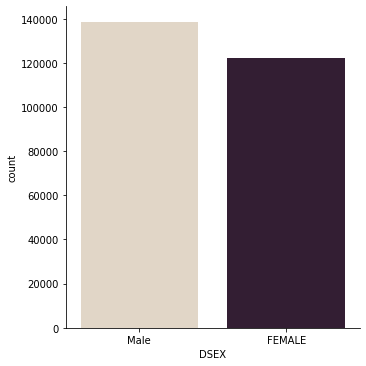

In [198]:
sns.catplot(data=df_2021, x="DSEX", kind="count", palette="ch:.25")

In [199]:
print('Percentage of Males Population are:',(df_2021[df_2021['DSEX']=='Male'].shape[0])/(df_2021.shape[0])*100)
print('Percentage of Females Population are:',(df_2021[df_2021['DSEX']=='FEMALE'].shape[0])/df_2021.shape[0]*100)

Percentage of Males Population are: 47.39983590865582
Percentage of Females Population are: 41.82414877615206


In [200]:
l={}
for i in range(0,df_agency.shape[0]):
    l[df_agency['CODE'][i]]=df_agency['NAME'][i]
df_2021['agency']=df_2021['agency'].map(l)

In [201]:
df_2021

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,All Other Agencies,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,...,A,B,B,B,B,A,Male,A,A,2.209652
1,194868625278,All Other Agencies,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,...,0,A,B,B,B,B,Male,A,C,2.209652
2,152966380283,All Other Agencies,5.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,...,B,B,B,B,A,B,Male,B,C,1.858874
3,193041162980,All Other Agencies,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,B,B,A,B,B,B,Male,A,A,1.228573
4,146655962451,All Other Agencies,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.0,...,B,B,B,B,B,B,Male,A,A,1.735842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292515,154057939422,Department of State,3.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,...,B,B,B,A,A,A,FEMALE,B,A,3.004992
292516,151758964104,Department of State,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,...,B,B,B,A,A,A,FEMALE,B,D,4.427855
292517,143492802997,Department of State,3.0,3.0,0.0,4.0,4.0,4.0,4.0,3.0,...,0,0,0,0,0,A,Male,0,A,4.202227
292518,110267537558,Department of State,2.0,4.0,5.0,5.0,2.0,1.0,5.0,4.0,...,B,B,B,A,A,A,FEMALE,B,C,3.523113


<AxesSubplot:xlabel='count', ylabel='DSEX'>

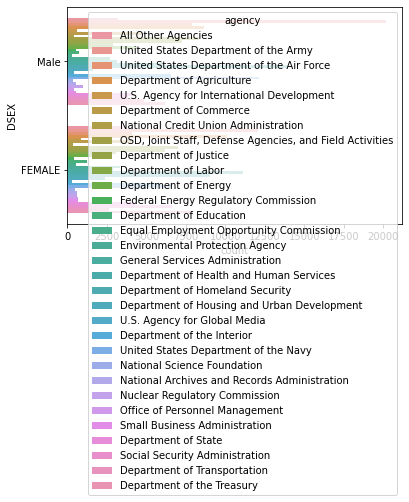

In [203]:
sns.countplot(data=df_2021, y="DSEX", hue="agency")

In [146]:
df_21 = df_2021.copy()
df_21 = df_21.drop(['RandomID', 'agency','POSTWT','DRNO','DHISP','DDIS','DSUPER','DFEDTEN','DMIL','DLEAVING','DAGEGRP'], axis=1)


In [147]:
df_21

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,DSEX
0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,...,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,Male
1,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,...,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,Male
2,5.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,...,5.0,4.0,5.0,5.0,5.0,2.0,4.0,4.0,4.0,Male
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,Male
4,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,2.0,...,5.0,5.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292515,3.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,5.0,3.0,...,4.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,5.0,FEMALE
292516,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,FEMALE
292517,3.0,3.0,0.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,Male
292518,2.0,4.0,5.0,5.0,2.0,1.0,5.0,4.0,5.0,4.0,...,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,FEMALE


In [205]:
male   = df_2021[df_2021.DSEX == 'Male']#.drop(['Gender', 'Age', 'Country'], axis=1)
female = df_2021[df_2021.DSEX == 'FEMALE']#.drop(['Gender', 'Age', 'Country'], axis=1)
no_entry  = df_2021[df_2021.DSEX == 'other']#.drop(['Gender', 'Age', 'Country'], axis=1)

In [ ]:
male.agency.max()

In [207]:
female.agency.max()

'United States Department of the Navy'

In [120]:
##https://www.kaggle.com/code/toomuchsauce/mental-health-plotly-interactive-viz

buttons = []
i = 0
vis = [False] *76

for col in df_2021.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 76
fig = go.Figure()

for col in df_2021.columns:
    fig.add_trace(go.Pie(
             values = df_2021[col].value_counts(),
             labels = df_2021[col].value_counts().index,
             title = dict(text = 'Distribution of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',))
fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('YlGn').as_hex(),
                              line=dict(color='#000000', width=1)))
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 1.15,
                        y = 0.85,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                             showarrow=False,
                             x = 1.06, y = 0.92, yref = "paper", align = "left")])
for i in range(1,74):
    fig.df_2021[i].visible = False

fig.show()

AttributeError: 'Figure' object has no attribute 'df_2021'

In [118]:
prop = pd.DataFrame(df_2021.DSEX.value_counts(normalize=True))
prop.style.applymap(lambda x : "background-color: #eaedb4")

,DSEX
Male,0.473998
FEMALE,0.418241
0,0.107760


In [23]:
print("Data set dimensions : {}".format(df_2021.shape))

Data set dimensions : (292520, 79)


In [25]:
df_2021.groupby('DSEX').size()

DSEX
FEMALE    122344
Male      138654
dtype: int64

In [27]:
df_2021.columns

Index(['RandomID', 'agency', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
       'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47_01',
       'Q47_02', 'Q47_03', 'Q47_04', 'Q47_05', 'Q47_06', 'Q47_07', 'Q47_08',
       'Q47_09', 'Q47_10', 'Q47_11', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53',
       'Q54', 'Q55', 'Q56', 'Q57', 'DRNO', 'DHISP', 'DDIS', 'DAGEGRP',
       'DSUPER', 'DFEDTEN', 'DSEX', 'DMIL', 'DLEAVING', 'POSTWT'],
      dtype='object')

In [28]:
data = df_2021.copy()
data = data.drop('RandomID', axis=1)
data = data.drop('agency', axis=1)

In [47]:
##https://www.kaggle.com/code/mahirahmzh/starbucks-customer-retention-analysis
## https://www.kaggle.com/code/rrrino39/starbucks-survey-xgboost-classification-prediction
## https://www.kaggle.com/code/elenasm/starbucks-survey-opinion-and-pivot-tables
X = data.iloc[:,0:60]
y =  data.iloc[:,-10]    


0           A
1         NaN
2           B
3           B
4           B
         ... 
292515      B
292516      B
292517    NaN
292518      B
292519      B
Name: DRNO, Length: 292520, dtype: object